In [1]:
import pandas as pd
df = pd.read_csv("clustering_synthetic_dataset.csv")
df

,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937
...,...,...
745,0.505927,1.213927
746,-1.640461,-0.469973
747,-0.057139,-0.909261
748,-1.169394,0.039597


C:\Users\phill\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='f1', ylabel='f2'>

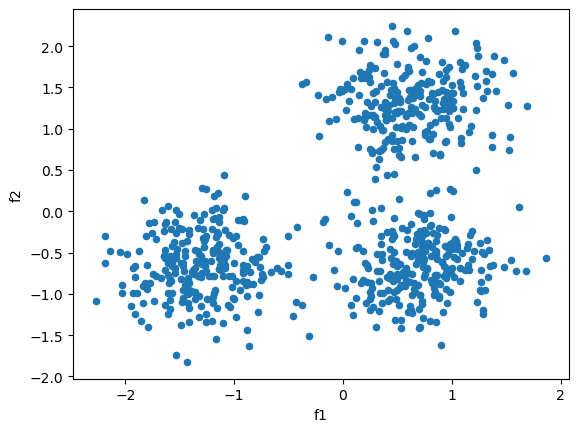

In [2]:
df.plot(x='f1',y='f2',kind='scatter')

In [3]:
#def cluster_separation():
    

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import adjusted_rand_score



km = KMeans(n_clusters=3)
km.fit(df)
(km.cluster_centers_)


array([[ 0.62260555,  1.3172598 ],
       [-1.30266211, -0.65704205],
       [ 0.6954587 , -0.64442334]])

In [5]:
print(km.predict([[1,-1.5],[1,1.5],[2,2],[-2,-1]]))

[2 0 0 1]


C:\Users\phill\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [6]:
def euclidean_distance(x1,x2):
    return ((x1[0]-x2[0])**2+(x1[1]-x2[1])**2)**.5

In [7]:
import math
def cluster_separation(km,num_clusters):
    total = 0
    for i in range(num_clusters):
        for j in range(i+1,num_clusters):
            total+=euclidean_distance(km.cluster_centers_[i],km.cluster_centers_[j])
    return total/math.comb(num_clusters,2)
    

In [8]:
def cluster_cohesion(km,num_clusters,X):
    counts = [0]*num_clusters
    sums = [0]*num_clusters
    centers = km.cluster_centers_
    for i in range(len(X)):
        pred = km.predict([X.iloc[i]])[0]
        counts[pred]+=1
        sums[pred] += euclidean_distance(centers[pred],X.iloc[i])
    
    #print(counts)
    #print(sums)
    for i in range(len(sums)):
        sums[i]/=counts[i]
    return max(sums)
    

In [9]:
import warnings
warnings.filterwarnings("ignore")
num_clusters = (2,3,4,5)
for i in num_clusters:
    km = KMeans(n_clusters=i)
    km.fit(df)
    print(f"For {i:d} clusters, the cluster separation "
          f"is {cluster_separation(km,i):.3f} and the max cluster cohesion is {cluster_cohesion(km,i,df):.3f}")
    

For 2 clusters, the cluster separation is 2.184 and the max cluster cohesion is 1.048
For 3 clusters, the cluster separation is 2.240 and the max cluster cohesion is 0.478
For 4 clusters, the cluster separation is 1.903 and the max cluster cohesion is 0.478
For 5 clusters, the cluster separation is 1.903 and the max cluster cohesion is 0.466


Q1: given the above metrics, and the scatterplot, I say there are 3 species.

In [22]:
km = KMeans(n_clusters=3,random_state=1)#I accidentally hard coded the cluster labels in later code,
#so random_state=1 is required
km.fit(df)
(km.cluster_centers_)

array([[ 0.62260555,  1.3172598 ],
       [-1.30266211, -0.65704205],
       [ 0.6954587 , -0.64442334]])

[]

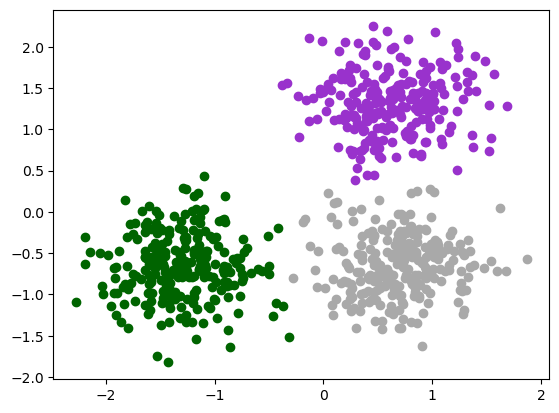

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

Colors = ['darkorchid', 'darkgreen', 'darkgrey', 'darksalmon', 'darkseagreen']
for i in range(len(df)):
    pred = km.predict([df.iloc[i]])[0]
    plt.scatter(df.iloc[i][0],df.iloc[i][1],color = Colors[pred])
plt.plot()

[]

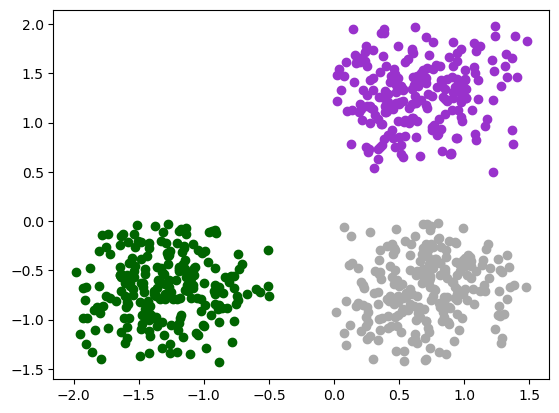

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
Colors = ['darkorchid', 'darkgreen', 'darkgrey', 'darksalmon', 'darkseagreen']
anomalies = [[],[],[]]
unclean_classes = []
for i in range(len(df)):
    pred = km.predict([df.iloc[i]])[0]
    unclean_classes.append(pred)
    if pred ==0:
        if (not (0<df.iloc[i][0]<1.5)) or not (.5<df.iloc[i][1]<2):
            anomalies[pred].append(df.iloc[i])
            continue
    if pred ==1:
        if (not (-2<df.iloc[i][0]<-.5)) or not (-1.5<df.iloc[i][1]<0):
            anomalies[pred].append(df.iloc[i])
            continue
    if pred ==2:
        if (not (0<df.iloc[i][0]<1.5)) or not (-1.5<df.iloc[i][1]<0):
            anomalies[pred].append(df.iloc[i])
            continue
    plt.scatter(df.iloc[i][0],df.iloc[i][1],color = Colors[pred])
    
unclean_classes = pd.DataFrame(unclean_classes,columns = ['class'])
plt.plot()

Q2: Cluster 0 has feature 1 in range (0,1.5), and feature 2 in range (.5,2)
Cluster 1 has feature 1 in range (-2,-.5), and feature 2 in range (-1.5,0)
Cluster 2 has feature 1 in range (0,1.5), and feature 2 in range (-1.5,0)

[]

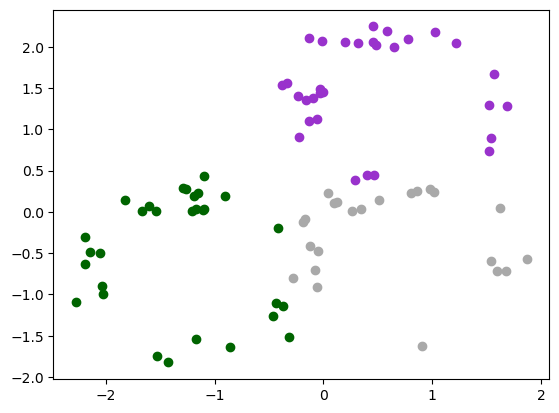

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
#Q3
for i in range(len(anomalies)):#Is there more math to determining anomalies, or do I just decide on the ranges?
    for X in anomalies[i]:
        plt.scatter(X[0],X[1],color = Colors[i])
plt.plot()

In [26]:
from sklearn.cluster import DBSCAN

dbs=DBSCAN(eps=.175)#am I supposed to try to tune the hyperparameters to get 3 clusters?
preds=dbs.fit_predict(df,y=df)
print(preds)

[ 0  1  0  2  0  1  1  2  0  0  1  1  1  2 -1  0 -1  1 -1  2  2  2  2  2
  1  1  2  0  0  2  0  1 -1  0  1  0  2  0  0 -1  2  1  1  1 -1  1  0  2
  0  1  2  2  1  1  2  2  1  0  2  1  2  2  2  2  2  0  2  2  0  0  0  2
  0  0  2  1 -1  1  0  2  1  1 -1  0  0 -1  1  2  1  2  2  0  1  0  1 -1
  1  1  0  0  2  1  2  0  2 -1  2  2 -1  0 -1  1  1  1  1  0  0  1  0  1
  2  1  0  0  1  2  1  0  0  2  0  2  2  2  0 -1  2  2  0  1  0  2  0  0
  2  2 -1  2  1 -1  2  1  1  2 -1  2 -1  1 -1  1  0  1  0  2  2 -1  1 -1
  2  1  0  1  2  2  2  1  1  2  2  0  1  2  0  0  2  0  0  1  0  1  0  1
  1  2  2  0  0  1  1  2  1  2 -1  2  2  0  2  0  2  2  0  2  2  2  0 -1
  1  1 -1  2  2  2  2  1  2  2  0  0  2  0  0  0  1  0  1  1  1  2  1  1
  0  1  2  2  1 -1  2  1  0  0  1  1  1  0  1  0  2  0  2 -1  2  2  2  1
  1 -1  0  1  1  0  0  2  1 -1  2  1  1  2  1  2  0  2 -1  0  1  2  2  0
  2  2  0  0  2  0  2  0  2  1  0  0  0  1  2  1  2  2  0  2  2  0  0  2
  1  1  1  1  1  0  1  1  1 -1  0  0  1  1  1  0  2

In [27]:
new_df = []
class_labels = []
for i in range(len(df)):
    if preds[i]!=-1:
        class_labels.append(preds[i])
        new_df.append(df.iloc[i])
        
new_df=pd.DataFrame(new_df)
new_df

,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937
...,...,...
745,0.505927,1.213927
746,-1.640461,-0.469973
747,-0.057139,-0.909261
748,-1.169394,0.039597


In [28]:
X = new_df
y = pd.DataFrame(class_labels,columns=['class'])
y

,class
0,0
1,1
2,0
3,2
4,0
...,...
680,0
681,1
682,2
683,1


[Text(0.4, 0.8333333333333334, 'X[0] <= -0.368\ngini = 0.667\nsamples = 685\nvalue = [226, 232, 227]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 232\nvalue = [0, 232, 0]'),
 Text(0.6, 0.5, 'X[1] <= 0.287\ngini = 0.5\nsamples = 453\nvalue = [226, 0, 227]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 227\nvalue = [0, 0, 227]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 226\nvalue = [226, 0, 0]')]

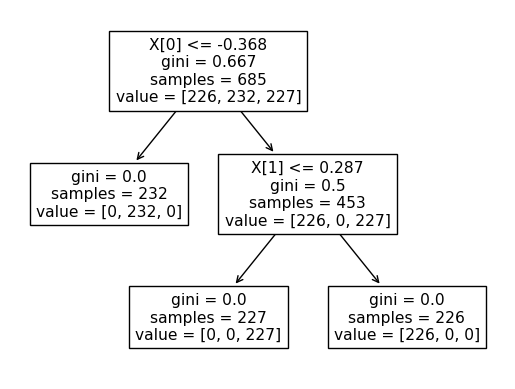

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
dtc = DecisionTreeClassifier()
dtc.fit(X,y)
plot_tree(dtc)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#Q6 clean tree
X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size=0.9, random_state=0)
#incredible accuracy score even from such a small training set
dtc.fit(X_train,y_train)
print("Clean tree on clean data accuracy:",accuracy_score(y_test,dtc.predict(X_test)))

#unclean tree
dtc2 = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(df, unclean_classes, test_size=0.4, random_state=0)
dtc2.fit(X_train,y_train)
print("Unclean tree on unclean data accuracy:",accuracy_score(y_test,dtc2.predict(X_test)))
print("Clean tree on unclean data accuracy:",accuracy_score(y_test,dtc.predict(X_test)))

Clean tree on clean data accuracy: 1.0
Unclean tree on unclean data accuracy: 0.9933333333333333
Clean tree on unclean data accuracy: 1.0


In [33]:
import numpy as np
dist = lambda a, b : np.sqrt(np.sum((a-b)**2))
print(dist(np.array([1,2]),np.array([4,1])))

3.1622776601683795
